In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

import numpy as np
from IPython.display import SVG, display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

A multibody system comprised of two uniformly dense thin rods of length $l$ and mass $𝑚$. Rod $𝐴$ is pinned at $𝑂$ and can rotate about $\hat{n}_{z}$ through $q_{1}$. Rod $B$ is pinned to $A$ and can rotate relative to $A$ about $\hat{a}_{x}$ through $q_{2}$. Linear torisional springs of stiffnes $k$ with a free length of zero resists each relative rotation. Gravitational forces are in the $\hat{n}_{x}$ direction.

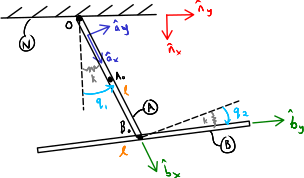

In [2]:
svg_path = "/Users/jalalelhazzat/Documents/DEV2023/jnbooks/Multibody/Images/Generalised-Forces-Rigid-Body.svg"
display(SVG(filename=svg_path))

# REFERENCE FRAME AND VARIABLES SETUP

Below we display the Direction Cosine Matrices of reference frame A and B with respect to reference frame N 



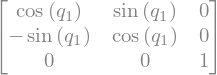

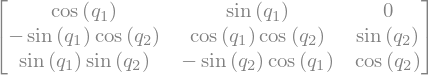

In [3]:
l, m, g, k = sm.symbols('l, m, g, k')
q1, q2, u1, u2 = me.dynamicsymbols('q1, q2, u1, u2')
t = me.dynamicsymbols._t

N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

A.orient_axis(N, q1, N.z)
B.orient_axis(A, q2, A.x)

print(f"Below we display the Direction Cosine Matrices of reference frame A and B "
      f"with respect to reference frame N \n")

A.dcm(N)
B.dcm(N)

# KINEMATICS

In [4]:
O = me.Point('O')
A0 = me.Point('A0')
B0 = me.Point('B0')

A0.set_pos(O, 0.5 * l * A.x)
B0.set_pos(O, l * A.x)

A0.pos_from(O).express(N)
B0.pos_from(A0).express(N)

In [5]:
A.set_ang_vel(N, q1.diff(t) * N.z)
B.set_ang_vel(A, q2.diff(t) * A.x)

A.ang_vel_in(N)
B.ang_vel_in(N)

In [6]:
O.set_vel(N, 0)
_ = A0.v2pt_theory(O, N, A)

A0.set_vel(A, 0)
_ = B0.v2pt_theory(A0, A, B)

A0.vel(N)
B0.vel(N)

We choose the generalised speeds to be equal to the inertial time derivative of generalised coordinates:

$$ 
    u_{1} = \dot{q}_{1} 
    u_{2} = \dot{q}_{2}
$$ 

We then rewrite velocities and angular velocities replacing instances of $\dot{q}_{1}$ and $\dot{q}_{2}$ with $u_{1}$ and $u_{2}$

In [7]:
generalised_speeds = {q1.diff(): u1, q2.diff(): u2}

N_v_A0 = A0.vel(N).xreplace(generalised_speeds)
N_v_B0 = B0.vel(N).xreplace(generalised_speeds)

N_v_A0
N_v_B0

N_w_A = A.ang_vel_in(N).xreplace(generalised_speeds)
N_w_B = B.ang_vel_in(N).xreplace(generalised_speeds)

N_w_A
N_w_B

### PARTIAL VELOCITIES

To compute the partial velocities $\boldsymbol{v}_{r}$ we compute the partial derivatives of the velocities for both bodies $A$ and $B$ with respect to $u_{r}$.

In [8]:
v_A0_1 = N_v_A0.diff(u1, N)
v_A0_2 = N_v_A0.diff(u2, N)
v_A0_t = N_v_A0.xreplace({u1: 0, u2: 0})

v_B0_1 = N_v_B0.diff(u1, N)
v_B0_2 = N_v_B0.diff(u2, N)
v_B0_t = N_v_B0.xreplace({u1: 0, u2: 0})

v_A0_1, v_A0_2, v_A0_t
v_B0_1, v_B0_2, v_B0_t

In [9]:
# generalised_speeds = {q1.diff(): u1, q2.diff(): u2}

# N_w_A = A.ang_vel_in(N).xreplace(generalised_speeds)
# N_w_B = B.ang_vel_in(N).xreplace(generalised_speeds)

# N_w_A
# N_w_B

### PARTIAL ANGULAR VELOCITIES

To compute the partial angular velocities $\boldsymbol{\omega}_{r}$ we compute the partial derivatives of the angular velocities for both bodies $A$ and $B$ with respect to $u_{r}$.

In [10]:
w_A_1 = N_w_A.diff(u1, N)
w_A_2 = N_w_A.diff(u2, N)
w_A_t = N_w_A.xreplace({u1: 0, u2: 0})

w_B_1 = N_w_B.diff(u1, N)
w_B_2 = N_w_B.diff(u2, N)
w_B_t = N_w_B.xreplace({u1: 0, u2: 0})

w_A_1, w_A_2, w_A_t
w_B_1, w_B_2, w_B_t

# GENERALISED ACTIVE FORCES

In [11]:
R_Ao = m * g * N.x
R_Bo = m * g * N.x

F1 = me.dot(v_A0_1, R_Ao) + me.dot(v_B0_1, R_Bo)
F2 = me.dot(v_A0_2, R_Ao) + me.dot(v_B0_2, R_Bo)

T_A = -k * q1 * N.z + k * q2 * A.x
T_B = -k * q2 * A.x

T1 = me.dot(w_A_1, T_A) + me.dot(w_B_1, T_B)
T2 = me.dot(w_A_2, T_A) + me.dot(w_B_2, T_B)


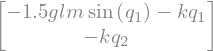

In [12]:
GAF = sm.Matrix([F1 + T1, F2 + T2])
GAF

#### ANOTHER WAY

# GENERALISED INERTIA FORCES

In [13]:
A0.vel(N)
B0.vel(N)

A.ang_vel_in(N)
B.ang_vel_in(N)

In [14]:
A0.acc(N)
B0.acc(N)

A.ang_acc_in(N)
B.ang_acc_in(N)

Similarly, we rewrite accelerations and angular accelerations replacing instances of $\dot{q}_{1}$, $\dot{q}_{2}$, $\ddot{q}_{1}$ and $\ddot{q}_{2}$ with $u_{1}$, $u_{2}$, $\dot{u}_{1}$ and $\dot{u}_{2}$

In [15]:
generalised_speeds = {q1.diff(): u1, q2.diff(): u2, q1.diff().diff(): u1.diff(), q2.diff().diff(): u2.diff()}

N_a_A0 = A0.acc(N).xreplace(generalised_speeds)
N_a_B0 = B0.acc(N).xreplace(generalised_speeds)

N_a_A0
N_a_B0

N_alpha_A = A.ang_acc_in(N).xreplace(generalised_speeds)
N_alpha_B = B.ang_acc_in(N).xreplace(generalised_speeds)

N_alpha_A
N_alpha_B

The principal moment of inertia of a rod about the the plan of symmetry orthogonal to the rod length 



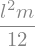

In [25]:
moment_of_inertia_rod = m * l**2 / 12

print(f"The principal moment of inertia of a rod about the the plan of "
      f"symmetry orthogonal to the rod length \n")
moment_of_inertia_rod

This is the rod A inertia dyadic and its matrix form 



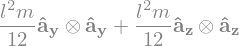

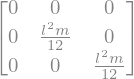


This is the rod B inertia dyadic and its matrix form 



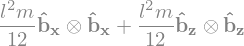

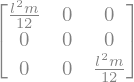

In [28]:
I_A_Ao = moment_of_inertia_rod * me.outer(A.y, A.y) + moment_of_inertia_rod * me.outer(A.z, A.z)
I_B_Bo = moment_of_inertia_rod * me.outer(B.x, B.x) + moment_of_inertia_rod * me.outer(B.z, B.z)

print(f"This is the rod A inertia dyadic and its matrix form \n")
I_A_Ao
I_A_Ao.to_matrix(A)
print(f"\nThis is the rod B inertia dyadic and its matrix form \n")
I_B_Bo
I_B_Bo.to_matrix(B)

In [19]:
R_Ao_star = -m * N_a_A0
R_Bo_star = -m * N_a_B0

F1_star = me.dot(v_A0_1, R_Ao_star) + me.dot(v_B0_1, R_Bo_star)
F2_star = me.dot(v_A0_2, R_Ao_star) + me.dot(v_B0_2, R_Bo_star)

In [20]:
T_A_star = -( 
    me.dot(N_alpha_A, I_A_Ao) + me.dot( me.cross(N_w_A, I_A_Ao), N_w_A )
)
T_B_star = -( 
    me.dot(N_alpha_B, I_B_Bo) + me.dot( me.cross(N_w_B, I_B_Bo), N_w_B )
)

T1_star = me.dot(w_A_1, T_A_star) + me.dot(w_B_1, T_B_star)
T2_star = me.dot(w_A_2, T_A_star) + me.dot(w_B_2, T_B_star)

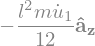

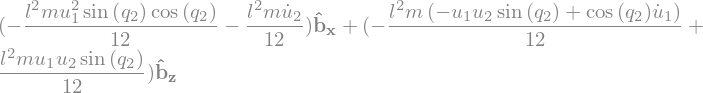

In [21]:
R_Ao_star, R_Bo_star

T_A_star
T_B_star

In [22]:
F1 = F1_star + T1_star
F2 = F2_star + T2_star

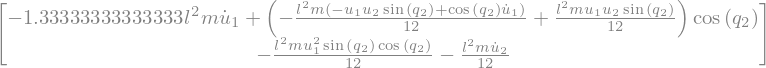

In [23]:
GIF = sm.Matrix([F1, F2])
GIF

# EQUATIONS OF MOTION

In [31]:
q = sm.Matrix([q1, q2])
u = sm.Matrix([u1, u2])

qd = q.diff(t)
ud = u.diff(t)

ud_zerod = {udr: 0 for udr in ud}

Mk = -sm.eye(3)
gk = u

Md = GIF.jacobian(ud)
gd = GIF.xreplace(ud_zerod) + GAF

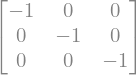

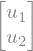

In [33]:
Mk
gk

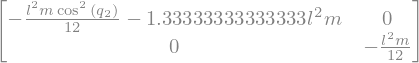

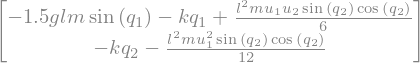

In [34]:
Md
gd